In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms, utils
from torch.utils import data

import matplotlib.pyplot as plt
import numpy as np

In [2]:
USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device("cuda" if USE_CUDA else "cpu")

In [3]:
EPOCHS     = 10
BATCH_SIZE = 64

In [4]:
transform=transforms.Compose([
                       transforms.ToTensor()
                   ])

In [7]:
trainset = datasets.MNIST(
    root      = './.data/', 
    train     = True,
    download  = True,
    transform = transform
)
testset = datasets.MNIST(
    root      = './.data/', 
    train     = False,
    download  = True,
    transform = transform
)

In [6]:
train_loader = data.DataLoader(
    dataset     = trainset,
    batch_size  = BATCH_SIZE, shuffle=True
)
test_loader = data.DataLoader(
    dataset     = testset,
    batch_size  = BATCH_SIZE, shuffle=True
)

In [7]:
dataiter = iter(train_loader)
images, labels = next(dataiter)

In [8]:
images[0].shape

torch.Size([1, 28, 28])

In [9]:
print(labels)

tensor([0, 3, 7, 7, 3, 4, 3, 6, 5, 0, 9, 1, 7, 4, 3, 7, 3, 2, 7, 2, 1, 6, 5, 7,
        7, 6, 9, 3, 7, 2, 9, 8, 6, 0, 9, 4, 4, 2, 4, 7, 4, 8, 0, 6, 2, 1, 3, 6,
        1, 1, 3, 9, 5, 6, 1, 5, 7, 5, 1, 6, 3, 1, 1, 5])


In [8]:
CLASSES = {
    0: 'zero',
    1: 'one',
    2: 'two',
    3: 'three',
    4: 'four',
    5: 'five',
    6: 'six',
    7: 'seven',
    8: 'eight',
    9: 'nine'
}


for label in labels:
    index = label.item()
    print(CLASSES[index])

9920512it [00:20, 4612202.73it/s]                                                                                      

(28, 28)


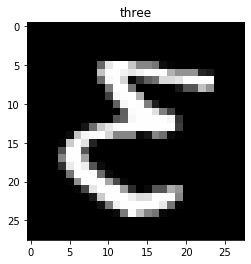

In [11]:
idx = 1

item_img = images[idx]
item_npimg = item_img.squeeze().numpy()
plt.title(CLASSES[labels[idx].item()])
print(item_npimg.shape)
plt.imshow(item_npimg, cmap='gray')
plt.show()

### (복습) DNN 모델을 작성해봅시다.

In [12]:
class Net(nn.Module):


    
    
    
    

### Convolution 모델을 같이 작성해봅시다.

In [2]:
class Net(nn.Module):

    
    
    
    
    

In [15]:
model     = Net().to(DEVICE)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

In [16]:
def train(model, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(DEVICE), target.to(DEVICE)
        optimizer.zero_grad()
        output = model(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()

        if batch_idx % 200 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

In [17]:
def evaluate(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(DEVICE), target.to(DEVICE)
            output = model(data)
            test_loss += F.cross_entropy(output, target,
                                         reduction='sum').item()
            pred = output.max(1, keepdim=True)[1]
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    return test_loss, test_accuracy

In [18]:
for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer, epoch)
    test_loss, test_accuracy = evaluate(model, test_loader)
    
    print('[{}] Test Loss: {:.4f}, Accuracy: {:.2f}%'.format(
          epoch, test_loss, test_accuracy))

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.296718
Train Epoch: 1 [12800/60000 (21%)]	Loss: 2.110795
Train Epoch: 1 [25600/60000 (43%)]	Loss: 1.243021
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.754420
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.810420
[1] Test Loss: 0.4777, Accuracy: 85.66%
Train Epoch: 2 [0/60000 (0%)]	Loss: 0.720999
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.647303
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.738958
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.522457
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.640629
[2] Test Loss: 0.2993, Accuracy: 90.65%
Train Epoch: 3 [0/60000 (0%)]	Loss: 0.700922
Train Epoch: 3 [12800/60000 (21%)]	Loss: 0.551432
Train Epoch: 3 [25600/60000 (43%)]	Loss: 0.489066
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.355402
Train Epoch: 3 [51200/60000 (85%)]	Loss: 0.427805
[3] Test Loss: 0.2304, Accuracy: 93.19%
Train Epoch: 4 [0/60000 (0%)]	Loss: 0.304986
Train Epoch: 4 [12800/60000 (21%)]	Loss: 0.385309
Train Epoch: 4 [25600/60000 (43%)]	Loss: 0.377238


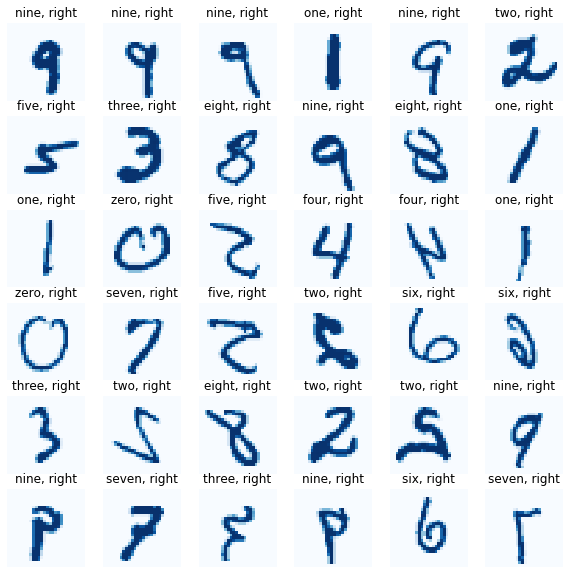

In [19]:
columns = 6
rows = 6
fig = plt.figure(figsize=(10,10))
 
model.eval()
for i in range(1, columns*rows+1):
    data_idx = np.random.randint(len(testset))
    input_img = testset[data_idx][0].unsqueeze(dim=0).to(DEVICE) 
 
    output = model(input_img)
    _, argmax = torch.max(output, 1)
    pred = CLASSES[argmax.item()]
    label = CLASSES[testset[data_idx][1]]
    
    fig.add_subplot(rows, columns, i)
    if pred == label:
        plt.title(pred + ', right')
        cmap = 'Blues'
    else:
        plt.title('N ' + pred + ' B ' +  label)
        cmap = 'Reds'
    plot_img = testset[data_idx][0][0,:,:]
    plt.imshow(plot_img, cmap=cmap)
    plt.axis('off')
    
plt.show() 

##  CNN을 이용해 Fashion MNIST 분류문제를 풀어봅시다

In [20]:
trainset = datasets.FashionMNIST(
    root      = './.data/', 
    train     = True,
    download  = True,
    transform = transform
)
testset = datasets.FashionMNIST(
    root      = './.data/', 
    train     = False,
    download  = True,
    transform = transform
)

In [21]:
CLASSES = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}


for label in labels:
    index = label.item()
    print(CLASSES[index])

T-shirt/top
Dress
Sneaker
Sneaker
Dress
Coat
Dress
Shirt
Sandal
T-shirt/top
Ankle boot
Trouser
Sneaker
Coat
Dress
Sneaker
Dress
Pullover
Sneaker
Pullover
Trouser
Shirt
Sandal
Sneaker
Sneaker
Shirt
Ankle boot
Dress
Sneaker
Pullover
Ankle boot
Bag
Shirt
T-shirt/top
Ankle boot
Coat
Coat
Pullover
Coat
Sneaker
Coat
Bag
T-shirt/top
Shirt
Pullover
Trouser
Dress
Shirt
Trouser
Trouser
Dress
Ankle boot
Sandal
Shirt
Trouser
Sandal
Sneaker
Sandal
Trouser
Shirt
Dress
Trouser
Trouser
Sandal


https://github.com/zalandoresearch/fashion-mnist